# Netflix Viewing Pattern Analysis



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Display plots inline
%matplotlib inline

In [3]:
df = pd.read_csv("netflix_titles.csv")

# Convert dates
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Strip whitespace
df['rating'] = df['rating'].str.strip()
df['country'] = df['country'].str.strip()

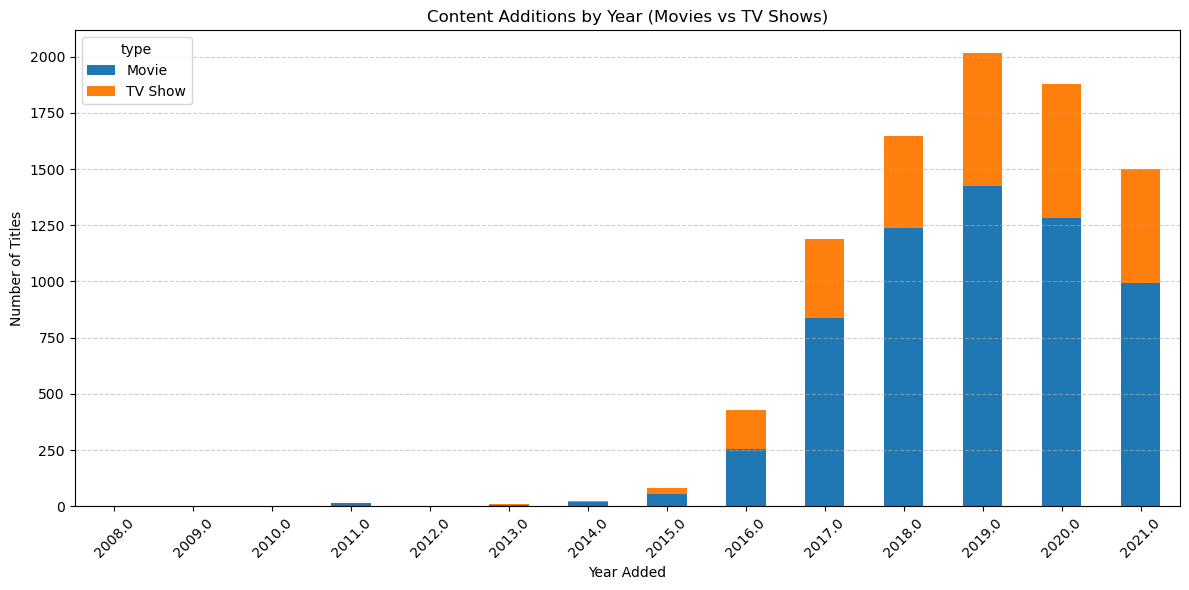

In [4]:
# Content additions by year and type
content_by_year = df.groupby(['year_added', 'type']).size().unstack()

content_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Content Additions by Year (Movies vs TV Shows)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

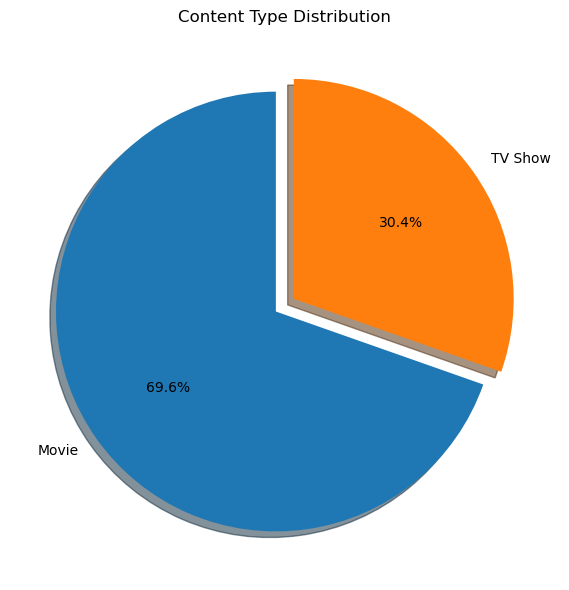

In [5]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.05, 0.05), figsize=(6,6))
plt.title("Content Type Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

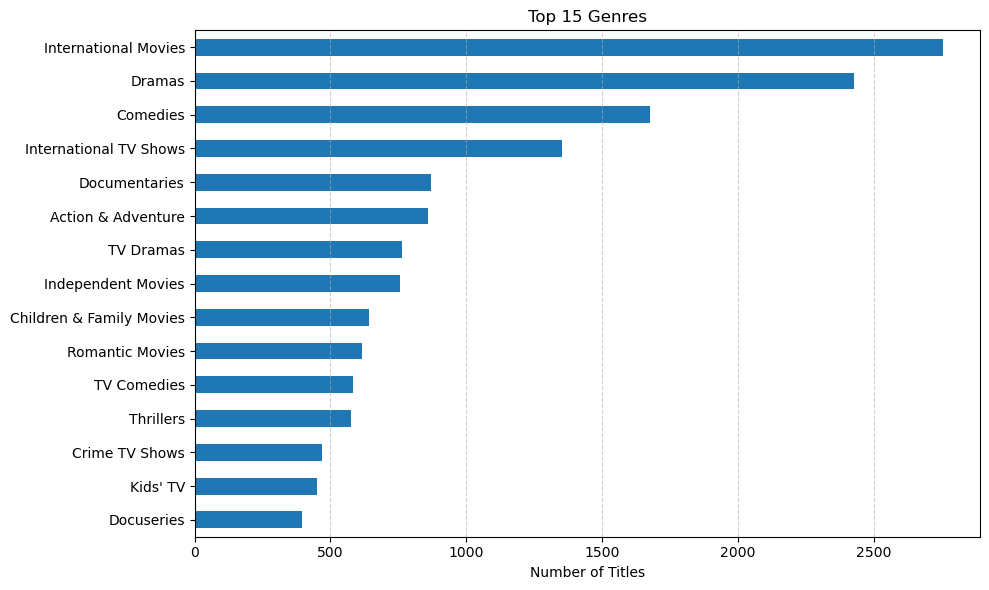

In [6]:
# Top genres
all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]
genre_counts = Counter(flat_genres)
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(15)

top_genres.plot(kind='barh', figsize=(10,6))
plt.title("Top 15 Genres")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

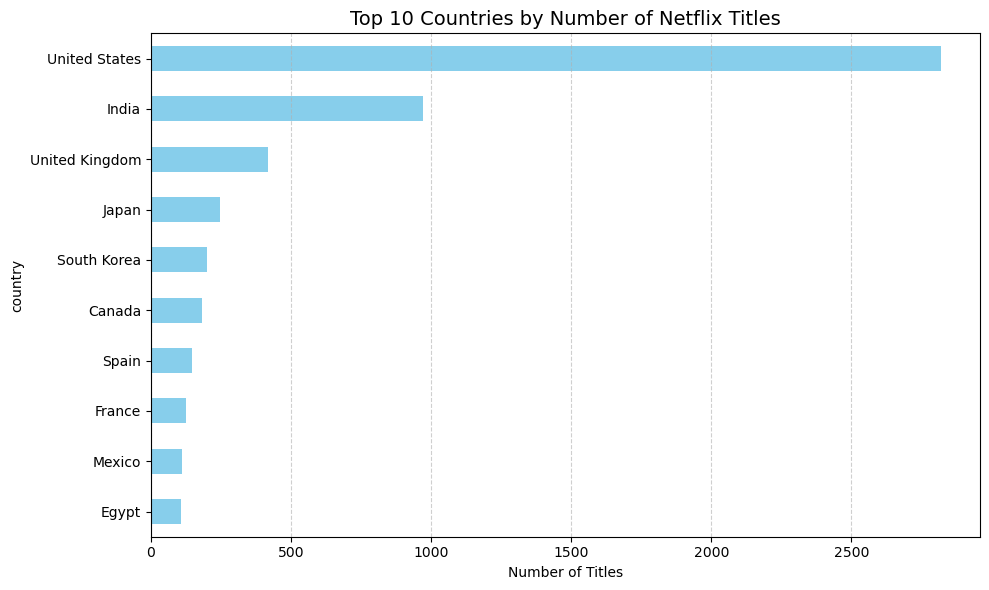

In [7]:
# Count top 10 countries by number of titles
top_countries = df['country'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries by Number of Netflix Titles", fontsize=14)
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()  # Show highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


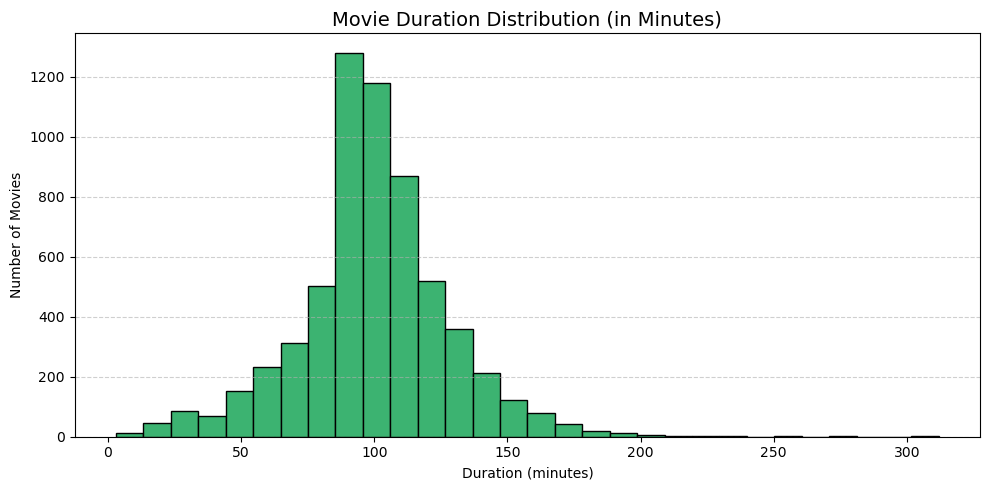

In [8]:
# Filter movies only
movies = df[df['type'] == 'Movie'].copy()

# Extract numeric duration from strings like '90 min'
movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 5))
plt.hist(movies['duration_min'].dropna(), bins=30, color='mediumseagreen', edgecolor='black')
plt.title("Movie Duration Distribution (in Minutes)", fontsize=14)
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


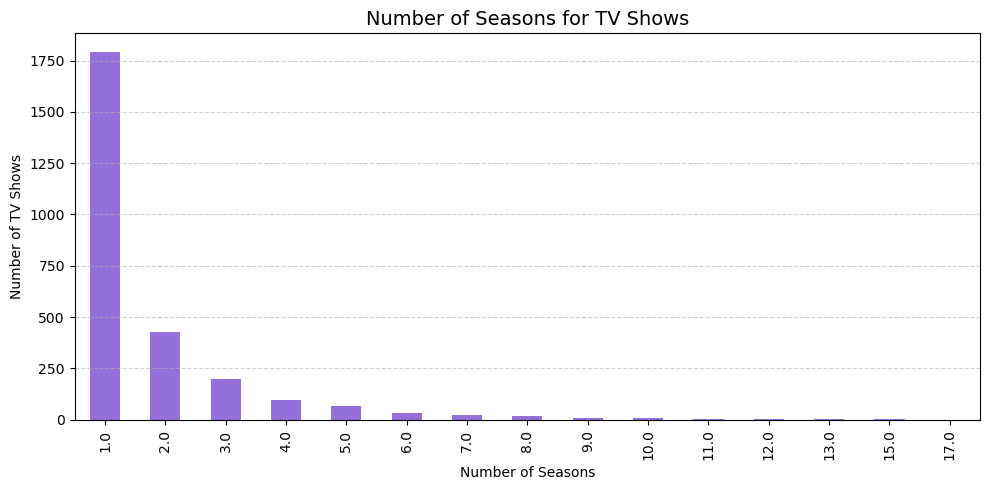

In [9]:
# Filter TV Shows only
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract number of seasons from 'duration' column (e.g., '2 Seasons')
tv_shows['num_seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# Count and sort number of shows per season
season_counts = tv_shows['num_seasons'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
season_counts.plot(kind='bar', color='mediumpurple')
plt.title("Number of Seasons for TV Shows", fontsize=14)
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [10]:
# Prepare data
df_model = df[['type', 'rating', 'country', 'release_year']]
df_model = df_model.dropna()

# Encode categorical features
le_type = LabelEncoder()
df_model['type'] = le_type.fit_transform(df_model['type'])  # 0 = Movie, 1 = TV Show

df_model = pd.get_dummies(df_model, columns=['rating', 'country'])

# Train-test split
X = df_model.drop('type', axis=1)
y = df_model['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1150
           1       0.61      0.51      0.55       445

    accuracy                           0.77      1595
   macro avg       0.71      0.69      0.70      1595
weighted avg       0.76      0.77      0.76      1595

Confusion Matrix:
 [[1003  147]
 [ 218  227]]


In [11]:
# Feature engineering
df_enhanced = df.copy()
df_enhanced['duration_min'] = df_enhanced['duration'].str.extract('(\d+)').astype(float)

# One-hot encode top 10 genres
top_genres = pd.Series(', '.join(df_enhanced['listed_in'].dropna()).split(', ')).value_counts().head(10).index.tolist()
for genre in top_genres:
    df_enhanced[f'genre_{genre}'] = df_enhanced['listed_in'].apply(lambda x: 1 if isinstance(x, str) and genre in x else 0)

# Prepare model DataFrame
features = ['type', 'rating', 'country', 'release_year', 'duration_min'] + [f'genre_{g}' for g in top_genres]
df_model2 = df_enhanced[features].dropna()

# Encode target and categorical features
from sklearn.preprocessing import LabelEncoder
df_model2['type'] = LabelEncoder().fit_transform(df_model2['type'])
df_model2 = pd.get_dummies(df_model2, columns=['rating', 'country'])

# Split
from sklearn.model_selection import train_test_split
X2 = df_model2.drop('type', axis=1)
y2 = df_model2['type']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1f/jwbnzng57kx6jdlrg5s5tcw00000gn/T/ipykernel_41930/3022890624.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_enhanced['duration_min'] = df_enhanced['duration'].str.extract('(\d+)').astype(float)


In [12]:
# Train enhanced Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train2, y_train2)
y_pred_logreg = logreg_model.predict(X_test2)

# Evaluate
print("Classification Report:\n", classification_report(y_test2, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred_logreg))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1117
           1       1.00      1.00      1.00       477

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594

Confusion Matrix:
 [[1115    2]
 [   0  477]]
